In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy import table
from astropy.table import Table, join, unique
from astropy.io import ascii
import astropy.io.fits as pyfits
from astropy.wcs import WCS
import os


In [2]:
# import SNeCO data
SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', "galaxy"))

database[0:1]

SNe      = SNe_Gal_Data["SN_name"]
SNeCheck = database["SN_name"]
SNRs     = database["pc150SNR"]

for i in range(len(database)):
    print(SNe[i], SNeCheck[i], SNRs[i])
    
print(database["SN_name"][0:3],database["pc150SNR"][0:3])

SN1996cr ASASSN-14ha 43.875626705857115
SN1940E SN1901B 6.082290424510207
SN2013ej SN1923A 8.042990573073627
SN2018ivc SN1926A -0.9589312309361526
SN1995V SN1935C 2.875848202238007
SN1999eu SN1940E 149.61251009871899
SN1992bd SN1950B 186.74701995112184
SN2001du SN1957D 94.64369427926755
SN1983V SN1959E 16.114654979763117
SN2012fr SN1960F -0.07243855195451242
SN1985P SN1961I 0.9012396002839006
SN1935C SN1964F 1.8292887432713723
SN1984J SN1967H 19.9791640699053
SN1986L SN1968L 627.7263693884347
SN2005df SN1972Q 3.8800655174177034
SN2009ib SN1973R 14.914917793829341
ASASSN-14ha SN1979C 1.369470070037107
SN2010el SN1981B -0.03573298039651665
SN1999em SN1983N 4.959830541589043
SN2017gax SN1983V 5.394262734348704
SN1993Z SN1984J 11.27287171109787
SN2008eh SN1985P 0.330964129110355
SN2003jg SN1986G 9.470342478421626
SN2012A SN1986I 13.44095791383598
SN1989B SN1986L 2.1528482608174366
SN2016cok SN1988A nan
SN2009hd SN1988M 0.0
SN1973R SN1989B 32.39374128426731
SN1967H SN1989M nan
SN1972Q SN199

In [3]:
# File location: /data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc7793/ngc7793_7m+tp_co21_150pc_broad_mom0.fits

In [4]:
# isolate unique galaxies, their distances, and their telescope orientation
galData = unique(SNe_Gal_Data,"galaxy")
gals, telOrient = galData["galaxy"], galData["telOrient"]

# for i in range(len(gals)):
#     print(gals[i], telOrient[i])

In [5]:
pc60FileList, pc90FileList, pc60errFile, pc90errFile = [],[],[],[]

def fileStr(galaxy, telOrient, res, mapType="img"):
    if galaxy ==  "ngc0628":
        telOrient = "12m+7m"
    if galaxy == "ngc3627":
        telOrient = "2_12m+7m"
    if galaxy == "ngc5236":
        telOrient = "12m+7m"
    if galaxy =="ngc6744":
        telOrient = "12m+7m+tp"        
        
    if mapType == "img":
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_mom0.fits")
    else:
        return("/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/" + galaxy + "/" + galaxy + "_" + telOrient + "_co21_" + str(res) + "pc_broad_emom0.fits")

for i in range(len(gals)):
    pc60FileList.append(fileStr(gals[i], telOrient[i], 60))
    pc60errFile.append(fileStr(gals[i], telOrient[i], 60, mapType="err"))


In [6]:
# group each galaxy's SNe data

gal_groups = database.group_by('galaxy')
galaxies = gal_groups.groups.keys
indices = gal_groups.groups.indices
indices = indices.tolist()
indices.append(0)
#print(gals)
print(indices)
# print(gal_groups["SN_name"][4])

images60, err60, name, types, ras, decs, dists, SNR150 = [],[],[],[],[],[],[],[]
for i in range(len(indices)-2):
    SNnames, SNtypes, SNras, SNdecs = [],[],[],[]
    images60.append(pc60FileList[i])
    err60.append(pc60errFile[i])
    SNR150.append(gal_groups["pc150SNR"][indices[i]])
    if gal_groups["SN_name"][indices[i]] != "SN1989B" and gal_groups["SN_name"][indices[i]] != "SN1973R":
    # Attach first SN per galaxy to a list
        SNnames.append(gal_groups["SN_name"][indices[i]])
        SNtypes.append(gal_groups["SN_type"][indices[i]])
        SNras.append(gal_groups["SN_ra"][indices[i]])
        SNdecs.append(gal_groups["SN_dec"][indices[i]])
    j = 1
    # attach additional  SN to list when galaxy has more than one
    while(indices[i] + j < indices[i+1]):    
        if gal_groups["SN_name"][indices[i]+j] != "SN1989B" and gal_groups["SN_name"][indices[i]+j] != "SN1973R":
            SNnames.append(gal_groups["SN_name"][indices[i]+j])
            SNtypes.append(gal_groups["SN_type"][indices[i]+j])
            SNras.append(gal_groups["SN_ra"][indices[i]+j])
            SNdecs.append(gal_groups["SN_dec"][indices[i]+j])
        j += 1
    name.append(SNnames)
    types.append(SNtypes)
    ras.append(SNras)
    decs.append(SNdecs)
    dists.append(gal_groups["dist"][indices[i]])
print(name)
print(dists)

[0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 16, 18, 19, 20, 21, 23, 24, 28, 32, 39, 45, 46, 47, 49, 50, 52, 53, 55, 60, 61, 62, 63, 0]
[['SN1996cr'], ['SN1940E'], ['SN2013ej'], ['SN2018ivc'], ['SN1995V'], ['SN1992bd', 'SN1999eu'], ['SN1983V', 'SN2001du', 'SN2012fr'], ['SN1985P'], ['SN1935C'], ['SN1984J', 'SN1986L', 'SN2005df', 'SN2009ib'], ['ASASSN-14ha', 'SN2010el'], ['SN1999em'], ['SN2017gax'], ['SN1993Z'], ['SN2003jg', 'SN2008eh'], ['SN2012A'], ['SN2009hd', 'SN2016cok'], ['SN1967H', 'SN1972Q', 'SN1986I', 'SN2014L'], ['SN1926A', 'SN1961I', 'SN1964F', 'SN1999gn', 'SN2006ov', 'SN2014dt', 'SN2020jfo'], ['SN1901B', 'SN1959E', 'SN1979C', 'SN2006X', 'SN2019ehk', 'SN2020oi'], ['SN2012cg'], ['SN2020nvb'], ['SN1960F', 'SN1988M'], ['SN1981B'], ['SN1988A', 'SN1989M'], ['SN2011ja'], ['SN1986G', 'SN2016adj'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2007it'], ['SN2005at'], ['SN2008bk']]
[4.2, 3.7, 9.84, 13.97, 15.85, 13.58, 19.57, 18.63, 15.28, 19.44, 17.69, 11.7, 19.4, 23.15, 14.06, 10

In [21]:
def getPlotStuff(gal, image, error, names, types, ras, decs, dists, SNRs):
    plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec = [],[],[], [],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(gal)):

        if os.path.isfile(image[i]):
            img = image[i]
            err=error[i]

            co_hdu = pyfits.open(img)
            hdus.append(co_hdu)

            beamMaj = co_hdu[0].header['BMAJ']
            beamMin = co_hdu[0].header['BMIN']
            
            if(beamMaj==beamMin):
                beamsizes.append(beamMaj)
            else:
                beamsizes.append(0.0)

            co_map = co_hdu[0].data
            plots.append(co_map)
            err_hdu = pyfits.open(err)
            err_map = err_hdu[0].data
            sig_map = co_map / err_map
            sigma.append(sig_map)
            w = WCS(co_hdu[0].header, naxis=2)
            wcss.append(w)
            x = co_map.shape[0]
            y = co_map.shape[1]
            naxis    = w._naxis # size of image naxis[0] = x and [1] = y
            grid     = np.indices((naxis[1],naxis[0]))
            aspect = float(y)/float(x)
            cdelt = co_hdu[0].header['CDELT1']
            cdelts.append(cdelt)
            ppb.append(beamMaj/np.abs(cdelt))
            plotAspect.append(aspect)
            corner.append(x/15.0)
            
            SNnames.append(name[i])
            SNtypes.append(types[i])
            SNras.append(ras[i]) 
            SNdecs.append(decs[i])
            SNgals.append(gal[i])
            samDists.append(dists[i])
            
            if(SNRs[i]) >= 3.0:
                isDetec.append("Detection")
            else:
                isDetec.append("Nondetection")
            
            
        else:
#             print("No 60 pc file for:",image[i])
            pass

    return(plots, sigma, wcss, hdus, beamsizes, plotAspect, ppb, corner, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetec)

In [22]:
# set up 60pc plots, wcs information, and make sigma maps for contours.

plots60, sigma60, wcss60, hdus60, beamsizes60, plotAspect60, ppb60, corner60, SNnames, SNtypes, SNras, SNdecs, SNgals, cdelts, samDists, isDetection = getPlotStuff(gals, images60, err60, name, types, ras, decs, dists, SNR150)

print(SNnames)

[['SN2013ej'], ['SN2009hd', 'SN2016cok'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2005at']]


In [23]:
legendLabels = []

for i in range(len(SNnames)):
    legendlabel = []
    if len(SNnames[i]) > 1:
        for k in range(len(SNnames[i])):
            if SNtypes[i][k] == 'unclassified':
                label = SNnames[i][k] + ' '  + SNtypes[i][k]
            else:
                label = SNnames[i][k] + ' Type '  + SNtypes[i][k]
            legendlabel.append(label)
    else:
        if SNtypes[i][0] == 'unclassified':
            legendlabel.append(SNnames[i][0] + ' '  + SNtypes[i][0]) 
        else:        
            legendlabel.append(SNnames[i][0] + ' Type '  + SNtypes[i][0])
    legendLabels.append(legendlabel)
print(legendLabels)

print(beamsizes60)


[['SN2013ej Type II'], ['SN2009hd Type II', 'SN2016cok Type II'], ['SN1923A Type II', 'SN1950B unclassified', 'SN1957D unclassified', 'SN1968L Type II', 'SN1983N Type Ib'], ['SN2005at Type Ic']]
[0.000349364509226111, 0.0002830785685173, 0.000703015699547022, 0.000366107217335989]


<ipython-input-24-1535b40f053e>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  current_cmap.set_bad("black")
<ipython-input-24-1535b40f053e>:19: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-24-1535b40f053e>:19: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


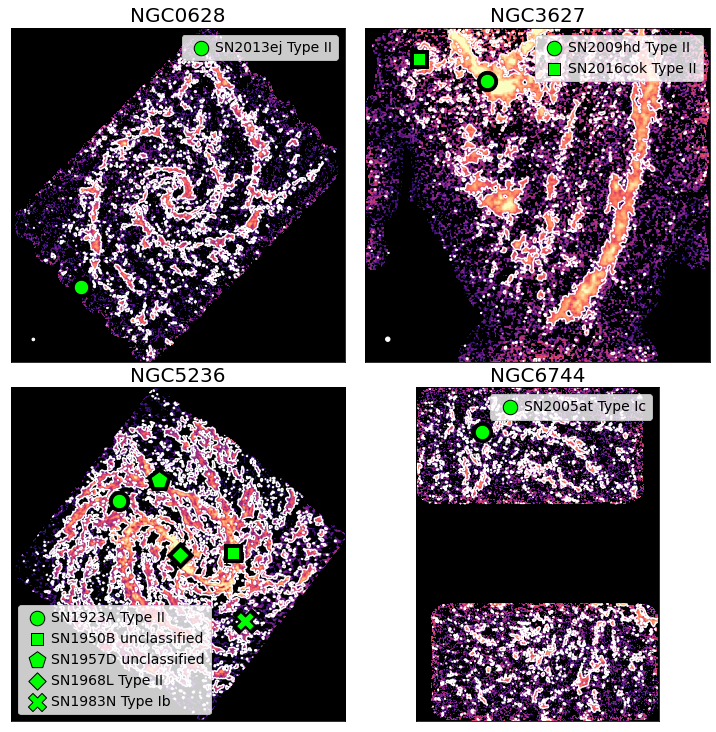

In [24]:
from matplotlib.patches import Circle


markerShapes = ["o", "s", "p", "D", "X", "H", "v"]
markerSizes  = [210,150,310,150,330,310,350]
markerEdges  = [410,350,610,350,630,610,650]

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

import math
i,j,m=0,0,0
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(math.ceil(len(plots60)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
for plot in plots60:
    draw_circle = plt.Circle((corner60[m], corner60[m]),ppb60[m], fill = True, color = 'white')

    xArr, yArr = wcss60[m].wcs_world2pix(SNras[m],SNdecs[m],0)
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
    axs[i][j].set_title(SNgals[m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    axs[i][j].add_patch(draw_circle)
    for n in range(len(SNdecs[m])):
        axs[i][j].scatter(xArr[n], yArr[n], color = "black", marker = markerShapes[n], s = markerEdges[n], zorder=2)
        axs[i][j].scatter(xArr[n], yArr[n], color = "lime", marker = markerShapes[n], s = markerSizes[n], edgecolor="black", label = legendLabels[m][n], zorder = 2)
    axs[i][j].contour(sigma60[m], [3], colors = ["white"], linestyles = ("-"), zorder = 1)
    axs[i][j].legend(loc="best", fontsize=14, handletextpad=0.007)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m +=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllSNeInGalaxies_60pc.png", dpi=300)
   
print()

In [25]:
print(plots60[3][2:10][2:10])
print(plots60[3][2:10])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [26]:
print(SNras)
print(SNgals)
print(SNnames)

[[24.2007], [170.0707, 170.0797], [204.2883, 204.2203, 204.2647, 204.252, 204.2135], [287.4733]]
['ngc0628', 'ngc3627', 'ngc5236', 'ngc6744']
[['SN2013ej'], ['SN2009hd', 'SN2016cok'], ['SN1923A', 'SN1950B', 'SN1957D', 'SN1968L', 'SN1983N'], ['SN2005at']]


332.88275158091994 356.5798802757223
407 257 281 431
228.49829813441235 1000.8518579072179
278 178 950 1050


<ipython-input-27-0e5f2587af8b>:51: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-27-0e5f2587af8b>:51: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)
<ipython-input-27-0e5f2587af8b>:22: RuntimeWarning: divide by zero encountered in log10
  logplot = np.log10(plot)
<ipython-input-27-0e5f2587af8b>:22: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


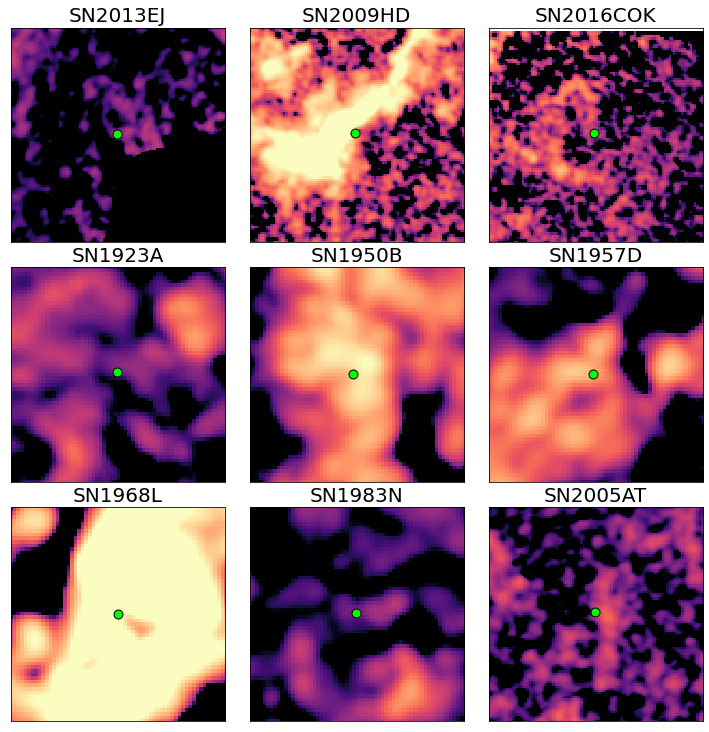

In [27]:

halfBox = 0.00416667 # 15'' in degrees
numSNe = 9
m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))

#for i in range(0,numSNe): # counter to count total plots
for j in range(len(SNgals)): # counter to count galaxy maps
    if  len(SNras[j]) > 1:
        for k in range(len(SNras[j])): # counter to count number of SN in each galaxy

            SNraStart  = SNras[j][k]  -  halfBox / np.cos(SNdecs[j][k] * np.pi/180)
            SNraEnd    = SNras[j][k]  +  halfBox / np.cos(SNdecs[j][k] * np.pi/180)
            SNdecStart = SNdecs[j][k] -  halfBox
            SNdecEnd   = SNdecs[j][k] +  halfBox

            xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][k],SNdecs[j][k],0)
            xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
            xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
            xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
            plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
            logplot = np.log10(plot)

            axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
            axs[m][n].set_ylim(yStart,yEnd)
            axs[m][n].set_xlim(xStart,xEnd)
            axs[m][n].set_title(SNnames[j][k].upper(), fontsize=20)
            axs[m][n].set_xticks([])
            axs[m][n].set_yticks([])
            axs[m][n].scatter(xVal, yVal, color = "black", marker = "o", s = 60, zorder=2)
            axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)
            
            n+=1
            if n%PLOTS_PER_ROW==0:
                m+=1
                n=0
            p +=1
    else:
        SNraStart  = SNras[j][0]  -  halfBox / np.cos(SNdecs[j][0] * np.pi/180)
        SNraEnd    = SNras[j][0]  +  halfBox / np.cos(SNdecs[j][0] * np.pi/180)
        SNdecStart = SNdecs[j][0] -  halfBox
        SNdecEnd   = SNdecs[j][0] +  halfBox

        xVal, yVal     = wcss60[j].wcs_world2pix(SNras[j][0],SNdecs[j][0],0)
        (print(xVal,yVal))
        xStart, yStart = wcss60[j].wcs_world2pix(SNraStart, SNdecStart,0)
        xEnd, yEnd     = wcss60[j].wcs_world2pix(SNraEnd, SNdecEnd,0)
        xStart, xEnd, yStart, yEnd = int(xStart), int(xEnd), int(yStart), int(yEnd)
        print(xStart, xEnd, yStart, yEnd)
        plot = plots60[j]#[xStart:xEnd][yStart:yEnd]
        logplot = np.log10(plot)

        axs[m][n].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.0, zorder = 0)
        axs[m][n].set_ylim(yStart,yEnd)
        axs[m][n].set_xlim(xStart,xEnd)

        axs[m][n].set_title(SNnames[j][0].upper(), fontsize=20)
        axs[m][n].set_xticks([])
        axs[m][n].set_yticks([])
        axs[m][n].scatter(xVal, yVal, color = "black", marker ="o", s = 60, zorder=2)
        axs[m][n].scatter(xVal, yVal, color = "lime", marker = "o", s = 80, edgecolor="black",zorder = 2)

        n+=1
        if n%PLOTS_PER_ROW==0:
            m+=1
            n=0
        p +=1

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/Zooms_60pc.png", dpi=300)


In [28]:
# Next draw out the spheres of influence
def findAngSize(sphere, dist):
    """ Finds the angular size in decimal degrees when given the 
        size of the sphere in pc and the
        distance to the galaxy in Mpc
    """
    
    angSizeRad = np.arctan(sphere/(dist*10**6))
    angSize = angSizeRad * (180/np.pi)
        
    return(angSize)

sphereSizes = [50,100,200]
angSizes = []

for i in range(len(samDists)):
    
    ang50 = findAngSize(sphereSizes[0], samDists[i])
    ang100 = findAngSize(sphereSizes[1], samDists[i])
    ang200 = findAngSize(sphereSizes[2], samDists[i])
    
    angSizes.append([ang50, ang100, ang200])

# Not used right now but this code finds the pixel sizes of the spheres un case we want to try to make a scale bar    


In [29]:
print()

<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: divide by zero encountered in log10
  logData = np.log10(data)
<ipython-input-40-a509e9974ed8>:17: RuntimeWarning: invalid value encountered in log10
  logData = np.log10(data)


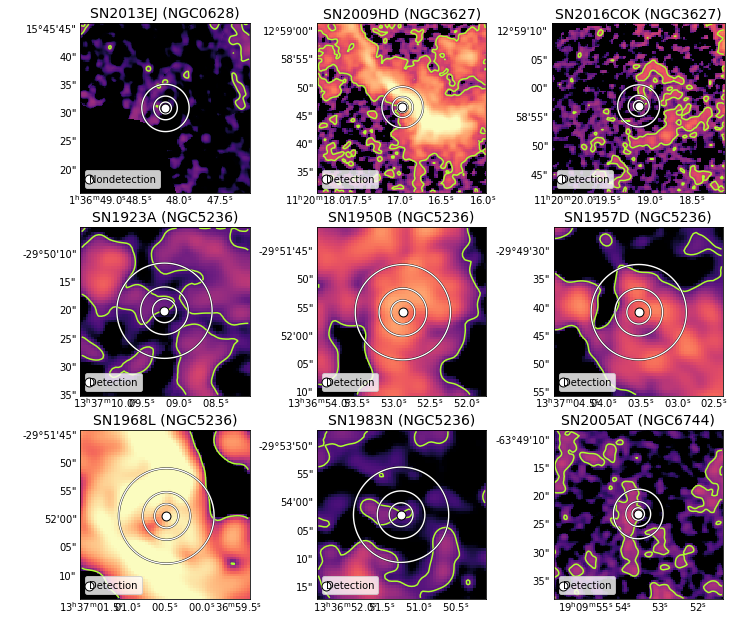

In [40]:
from astropy.coordinates import SkyCoord, Angle
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
from astropy.visualization.wcsaxes import SphericalCircle

m,n,p =0,0,0 # plot counters for total number, rows, columns
PLOTS_PER_ROW = 3
#fig, axs = plt.subplots(math.ceil(numSNe/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10, 10))
fig = plt.figure(figsize = (10,10))


for j in range(len(SNgals)): # counter to count galaxy maps

    #set up data to use astropy's cutout2D to plot subsections of galaxy map
    data = plots60[j]
    logData = np.log10(data)    
    sigData = sigma60[j]
    wcs=wcss60[j]
    
    #Account for galaxies that have more than one SN
    if  len(SNras[j]) > 1:
        for k in range(len(SNras[j])): # counter to count number of SN in each galaxy

            #cutout2D needs skycoord position to carry units
            ra, dec = Angle(SNras[j][k] * u.degree), Angle(SNdecs[j][k] * u.degree)
            raRad, decRad  = ra.radian * u.rad, dec.radian * u.rad    
            position = SkyCoord(raRad, decRad) #position is center, use ra & dec of SN location
            size = u.Quantity((30,30), u.arcsec) #size is size of box in arcsec 
            # make 2D cutout, will assign a new wcs to cutout to keep track of coords
            cutout = Cutout2D(logData, position, size, wcs) 
            # use this new wcs when converting to pixels to add additional details to plot
            xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
            # get S-N-R data for contours
            sigCutout = Cutout2D(sigData, position, size, wcs)
            
            titleStr = SNnames[j][k].upper() + " (" + SNgals[j].upper() + ")"
            # make plot
            axs[m][n] = fig.add_subplot(3,3,p+1,projection = cutout.wcs)
            axs[m][n].set_title(titleStr, fontsize=14)            
            axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
            axs[m][n].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
            axs[m][n].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=isDetection[j])
            axs[m][n].set_ylabel(" ")
            axs[m][n].set_xlabel(" ")
            axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
            axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)

            #get spheres of influence
            spheres = angSizes[j]
            c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
            c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=1.4,transform=axs[m][n].get_transform('world'))
            c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=2.1,transform=axs[m][n].get_transform('world'))
            c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
            c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
            c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
            c = [c50a, c50b, c100a,c100b,c200a,c200b]
            for q in range(len(c)):
                axs[m][n].add_patch(c[q])
                                
            #get Pixel distance for scalebar
            pixDists=[]
            for i in range(len(spheres)):
                sphereEdgeRa, sphereEdgeDec = ra + Angle(spheres[i]*u.degree), dec + Angle(spheres[i]*u.degree)
                sphereEdgex, sphereEdgey = cutout.wcs.wcs_world2pix(sphereEdgeRa, sphereEdgeDec, 0)
                pixDistx, pixDisty = sphereEdgex-xval, sphereEdgey-yval
                pixDists.append(np.sqrt((pixDistx**2 + pixDisty**2)/2))
                
            lowerleftra  = ra.value + halfBox 
            lowerleftdec = dec.value - halfBox + halfBox*0.1
            val=spheres[1]

            xArr, yArr = np.linspace(lowerleftra, lowerleftra-val, 100),np.linspace(lowerleftdec, lowerleftdec, 100)
            #axs[m][n].plot(xArr,yArr, color='white', linestyle='-', transform=axs[m][n].get_transform("world"))
            #axs[m][n].text(lowerleftra, lowerleftdec, '100pc', color='white', transform=axs[m][n].get_transform('world'))
#             axs[m][n].text(0,0,isDetection[j],color="cyan", weight='bold', fontsize=16)    
            axs[m][n].legend(handlelength=0, handletextpad=0, loc="lower left")

            #iterate over m rows, n columns, and p is total number of plots
            n+=1
            if n%PLOTS_PER_ROW==0:
                m+=1
                n=0
            p +=1
            
    #These galaxies have only one SN
    else:

        ra, dec = Angle(SNras[j][0] * u.degree), Angle(SNdecs[j][0] * u.degree)
        raRad,  decRad  = ra.radian * u.rad, dec.radian * u.rad    
        position = SkyCoord(raRad, decRad)
        size = u.Quantity((30,30), u.arcsec)
        cutout = Cutout2D(logData, position, size, wcs)
        xval, yval = cutout.wcs.wcs_world2pix(ra,dec, 0)
        sigCutout = Cutout2D(sigData, position, size, wcs)        
        titleStr = SNnames[j][0].upper() + " (" + SNgals[j].upper() + ")"
        axs[m][n] = fig.add_subplot(3,3,p+1,projection = cutout.wcs)
        axs[m][n].set_title(titleStr, fontsize=14)
        axs[m][n].imshow(cutout.data, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest", vmin = -0.5, vmax = 2.5, zorder = 0)
        axs[m][n].scatter(xval, yval, color = "black", marker ="o", s = 60, zorder=2)
        axs[m][n].scatter(xval, yval, color = "white", marker = "o", s = 80, edgecolor="black",zorder = 2, label=isDetection[j])
        axs[m][n].set_ylabel(" ")
        axs[m][n].set_xlabel(" ")
        axs[m][n].tick_params(axis = "both", direction = "in", length = 0)
        axs[m][n].contour(sigCutout.data, [3], colors = ["greenyellow"], linestyles = ("-"), zorder = 1)
        spheres = angSizes[j]
        c50a = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
        c50b = SphericalCircle((ra,dec), spheres[0] * u.degree, ec = "white", fill = False,lw=1.4,transform=axs[m][n].get_transform('world'))
        c100a = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "black", fill = False,lw=2.1,transform=axs[m][n].get_transform('world'))
        c100b = SphericalCircle((ra,dec), spheres[1] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
        c200a = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "black", fill = False, lw=2.1,transform=axs[m][n].get_transform('world'))
        c200b = SphericalCircle((ra,dec), spheres[2] * u.degree, ec = "white", fill = False, lw=1.4,transform=axs[m][n].get_transform('world'))
        c = [c50a, c50b, c100a,c100b,c200a,c200b]
        for q in range(len(c)):
            axs[m][n].add_artist(c[q])
        lowerleftra  = ra.value + halfBox 
        lowerleftdec = dec.value - halfBox + halfBox*0.1
        val=spheres[1]

        xArr, yArr = np.linspace(lowerleftra, lowerleftra-val, 100),np.linspace(lowerleftdec, lowerleftdec, 100)
        #axs[m][n].plot(xArr,yArr, color='white', linestyle='-', transform=axs[m][n].get_transform("world"))
        axs[m][n].legend(handlelength=0, handletextpad=0, loc="lower left")
        n+=1
        if n%PLOTS_PER_ROW==0:
            m+=1
            n=0
        p +=1
    plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1.01, top = 0.9, wspace = 0.3, hspace = 0.2)
#plt.tight_layout(pad=0.5, w_pad=6.8, h_pad=1.0)
fig.savefig("../Figures/Zooms_60pc.png", dpi=300)
plt.show()


In [31]:
print(isDetection)

['Nondetection', 'Detection', 'Detection', 'Detection']
